In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from models import VGG

print(tf.__version__)

c:\program files\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
input_img = Input(shape=(28, 28))  # adapt this if using `channels_first` image data format
x = keras.layers.Reshape((28,28,1))(input_img)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #28 x 28 x 32
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

In [8]:
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
decoded = keras.layers.Reshape((28,28))(decoded)

In [9]:
autoencoder = keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         147712    
__________

In [ ]:
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.3036
Epoch 2/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.2661
Epoch 3/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.2596
Epoch 4/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2564
Epoch 5/10
36224/60000 [=================>............] - ETA: 7s - loss: 0.2545

In [12]:
decoded_imgs = autoencoder.predict(test_images[:11])

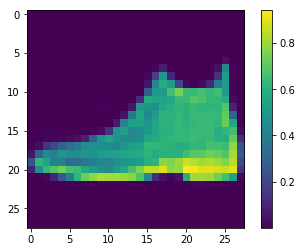

In [13]:
plt.figure()
plt.imshow(decoded_imgs[0])
plt.colorbar()
plt.grid(False)

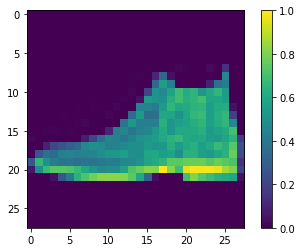

In [14]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

In [18]:
print(decoded_imgs[0][15], test_images[0][15])

[0.00158149 0.00431898 0.00810135 0.00666217 0.00930325 0.00846566
 0.00722269 0.00687402 0.01179991 0.02785356 0.13601796 0.47617072
 0.5387332  0.4423969  0.46276623 0.5140753  0.5557097  0.59417844
 0.6021157  0.62374973 0.6219643  0.6368223  0.6355275  0.63451785
 0.5868854  0.6173791  0.6530835  0.03659527] [0.         0.         0.00784314 0.00784314 0.00392157 0.00784314
 0.         0.         0.         0.         0.10196078 0.42352941
 0.45882353 0.38823529 0.43529412 0.45882353 0.53333333 0.61176471
 0.5254902  0.60392157 0.60392157 0.61176471 0.62745098 0.55294118
 0.57647059 0.61176471 0.69803922 0.        ]


In [19]:
encoder = keras.models.Model(input_img, conv3)

In [20]:
encoded_imgs = encoder.predict(test_images[:11])

In [21]:
encoded_imgs[0].shape

(7, 7, 128)

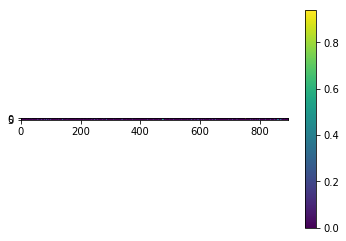

In [22]:
plt.figure()
plt.imshow(encoded_imgs[0].reshape(7, 7 * 128))
plt.colorbar()

In [23]:
for layer in encoder.layers:
    layer.trainable = False

In [24]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
Total para

In [25]:
x = keras.layers.Flatten()(encoder.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)

In [26]:
classifier = Model(encoder.input, x)

In [27]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [28]:
classifier.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
classifier.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 192us/step - loss: 0.3522 - acc: 0.8729 - val_loss: 0.3015 - val_acc: 0.8892
Epoch 2/10
54000/54000 [==============================] - 8s 156us/step - loss: 0.2528 - acc: 0.9067 - val_loss: 0.2576 - val_acc: 0.9013
Epoch 3/10
54000/54000 [==============================] - 8s 154us/step - loss: 0.2168 - acc: 0.9189 - val_loss: 0.2515 - val_acc: 0.9080
Epoch 4/10
54000/54000 [==============================] - 8s 157us/step - loss: 0.1924 - acc: 0.9273 - val_loss: 0.2544 - val_acc: 0.9050
Epoch 5/10
54000/54000 [==============================] - 9s 161us/step - loss: 0.1691 - acc: 0.9353 - val_loss: 0.2471 - val_acc: 0.9107
Epoch 6/10
54000/54000 [==============================] - 9s 161us/step - loss: 0.1499 - acc: 0.9442 - val_loss: 0.2602 - val_acc: 0.9087
Epoch 7/10
54000/54000 [==============================] - 9s 160us/step - loss: 0.1348 - acc: 0.9491 - val_loss: 0.2663 - 

In [30]:
test_loss, test_acc = classifier.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 76us/step
Test accuracy: 0.9051
